In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

params = {'legend.fontsize': 14,
          'axes.labelsize': 16,
          'axes.titlesize':16,
          'xtick.labelsize':14,
          'ytick.labelsize':14,
          'figure.figsize':(13, 7),
          'axes.grid':True}
plt.rcParams.update(params)



In [2]:
file1 = 'Rate.csv'
df = pd.read_csv(file1)


In [3]:
df.size
#df.columns
df.shape

(12694445, 24)

In [4]:
df['BusinessYear'].unique()

array([2014, 2015, 2016])

In [5]:
df.head(5)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


In [6]:
df.columns

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate', 'PlanId', 'RatingAreaId', 'Tobacco', 'Age',
       'IndividualRate', 'IndividualTobaccoRate', 'Couple',
       'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents',
       'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent',
       'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents',
       'RowNumber'],
      dtype='object')

In [7]:
#Group the data according to year
df_2014 = df[df['BusinessYear']==2014]
df_2015 = df[df['BusinessYear']==2015]
df_2016 = df[df['BusinessYear']==2016]

In [ ]:
df['PlanId'].unique()

plans = list(df['PlanId'].unique())
#print(plan[0:5])
#type(df['PlanId'].unique())
#print(len(df['PlanId'].unique()))

In [10]:
#df_2014.groupby(['Age']).mean() #.iloc[1:-1,4]]
comp_data_2014 = df_2014[['Age','IndividualRate','Couple','CoupleAndOneDependent']]
comp_data_2015 = df_2015[['Age','IndividualRate','Couple','CoupleAndOneDependent']]
comp_data_2016 = df_2016[['Age','IndividualRate','Couple','CoupleAndOneDependent']]


'\n#comp_data = df_2014[[\'Age\',\'IndividualRate\',\'Couple\',\'CoupleAndOneDependent\']]\nplt.figure()\ncomp_data_2014[comp_data_2014[\'IndividualRate\']<1500].hist(column=\'IndividualRate\',\n                                                           bins=100,histtype=\'step\',\n                                                           lw=1.5,color=\'r\',\n                                                          label=\'2014\')\ncomp_data_2015[comp_data_2015[\'IndividualRate\']<1500].hist(column=\'IndividualRate\',bins=100,\n                                                           histtype=\'step\',lw=1.5,color=\'b\',\n                                                          label=\'2015\')\ncomp_data_2016[comp_data_2016[\'IndividualRate\']<1500].hist(column=\'IndividualRate\',bins=100,\n                                                           histtype=\'step\',lw=1.5,color=\'g\',\n                                                          label=\'2016\')\nplt.yscale(\'log\')\

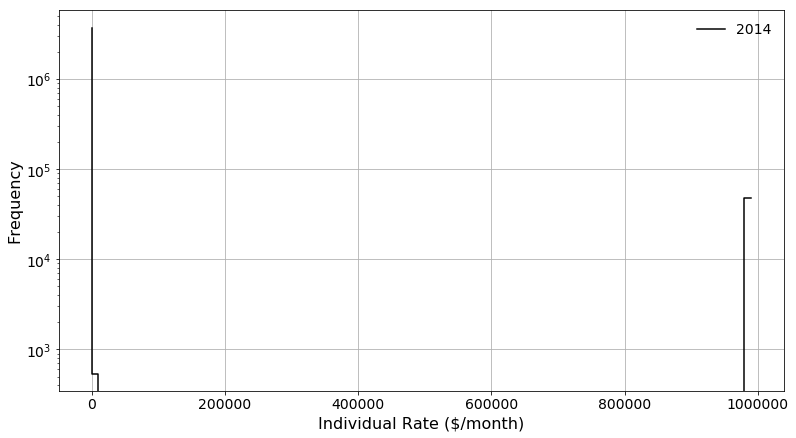

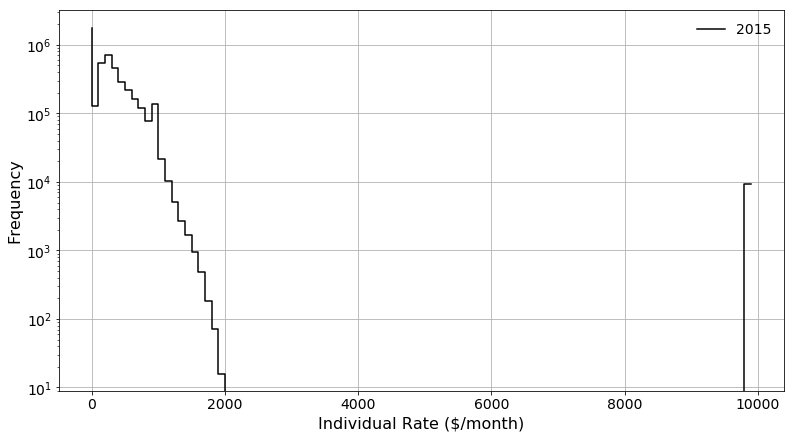

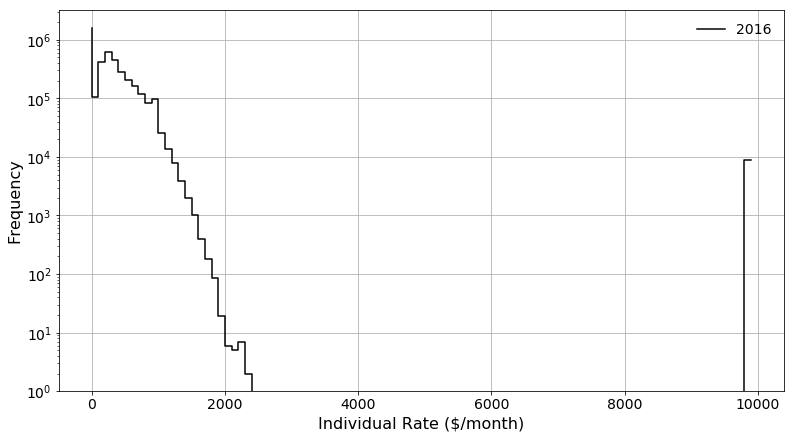

In [31]:
indiv_rate14 = np.array(comp_data_2014['IndividualRate'].tolist())
indiv_rate15 = np.array(comp_data_2015['IndividualRate'].tolist())
indiv_rate16 = np.array(comp_data_2016['IndividualRate'].tolist())
'''
# Individual Rate
y14, x14 = np.histogram(comp_data_2014['IndividualRate']<4000, bins=100)
y15, x15 = np.histogram(comp_data_2015['IndividualRate']<4000, bins=100)
y16, x16 = np.histogram(comp_data_2016['IndividualRate']<4000, bins=100)
'''
y14,x14 = np.histogram(indiv_rate14[~np.isnan(indiv_rate14)], bins=100) #<1500])
y15,x15 = np.histogram(indiv_rate15[~np.isnan(indiv_rate15)], bins=100)
y16,x16 = np.histogram(indiv_rate16[~np.isnan(indiv_rate16)], bins=100)

plt.figure()
plt.step(x14[:-1],y14, color='k', label='2014')
plt.yscale('log')
#plt.xlim(0,200000)
plt.xlabel("Individual Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

plt.figure()
plt.step(x15[:-1],y15, color='k', label='2015')
plt.yscale('log')
#plt.xlim(0,200000)
plt.xlabel("Individual Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

plt.figure()
plt.step(x16[:-1],y16, color='k', label='2016')
plt.yscale('log')
#plt.xlim(0,200000)
plt.xlabel("Individual Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

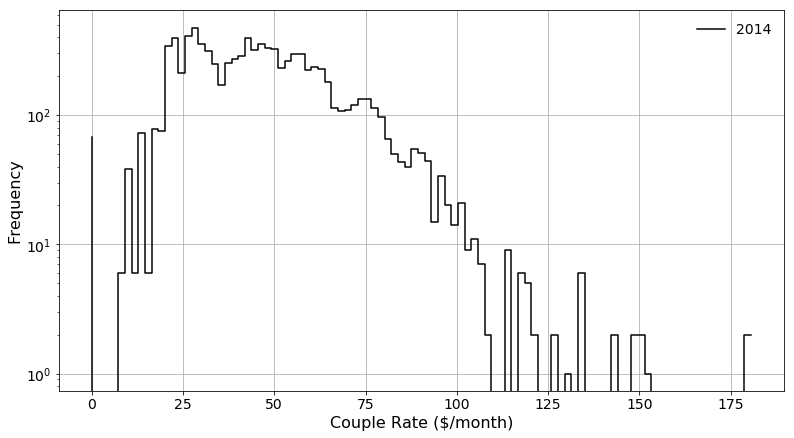

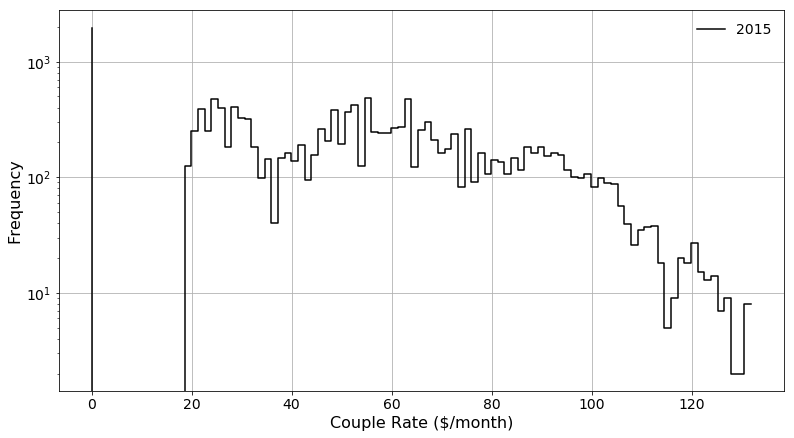

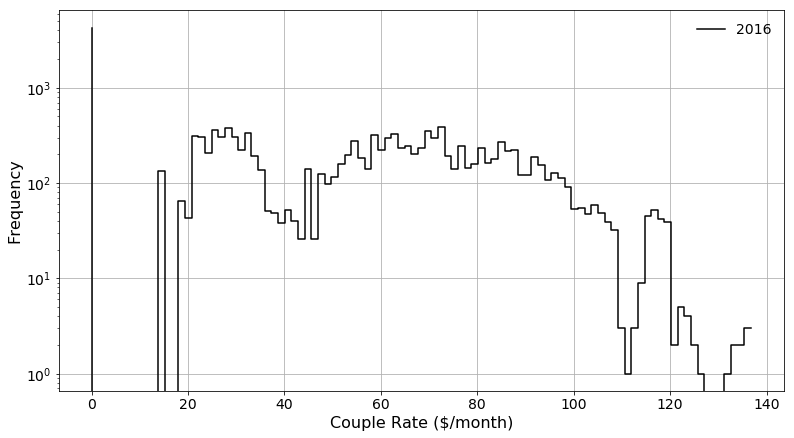

In [12]:
# Couple Rate

couple_rate14 = np.array(comp_data_2014['Couple'].tolist())
couple_rate15 = np.array(comp_data_2015['Couple'].tolist())
couple_rate16 = np.array(comp_data_2016['Couple'].tolist())

y14,x14 = np.histogram(couple_rate14[~np.isnan(couple_rate14)], bins=100) #<1500])
y15,x15 = np.histogram(couple_rate15[~np.isnan(couple_rate15)], bins=100)
y16,x16 = np.histogram(couple_rate16[~np.isnan(couple_rate16)], bins=100)

plt.figure()
plt.step(x14[:-1],y14, color='k', label='2014')
plt.yscale('log')
plt.xlabel("Couple Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

plt.figure()
plt.step(x15[:-1],y15, color='k', label='2015')
plt.yscale('log')
plt.xlabel("Couple Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

plt.figure()
plt.step(x16[:-1],y16, color='k', label='2016')
plt.yscale('log')
plt.xlabel("Couple Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

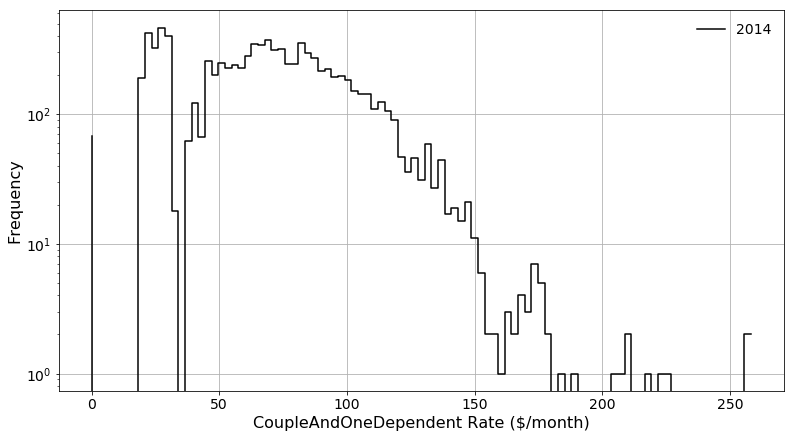

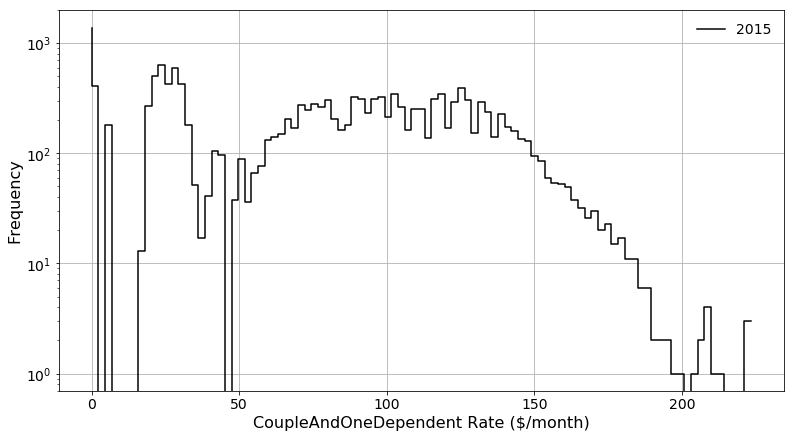

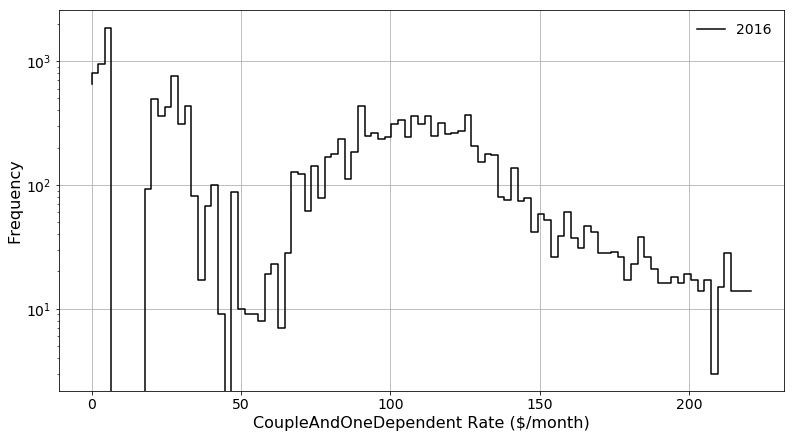

In [13]:
# Coupld and One Dependent
couple1d_rate14 = np.array(comp_data_2014['CoupleAndOneDependent'].tolist())
couple1d_rate15 = np.array(comp_data_2015['CoupleAndOneDependent'].tolist())
couple1d_rate16 = np.array(comp_data_2016['CoupleAndOneDependent'].tolist())

y14,x14 = np.histogram(couple1d_rate14[~np.isnan(couple_rate14)], bins=100) #<1500])
y15,x15 = np.histogram(couple1d_rate15[~np.isnan(couple_rate15)], bins=100)
y16,x16 = np.histogram(couple1d_rate16[~np.isnan(couple_rate16)], bins=100)

plt.figure()
plt.step(x14[:-1],y14, color='k', label='2014')
plt.yscale('log')
plt.xlabel("CoupleAndOneDependent Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

plt.figure()
plt.step(x15[:-1],y15, color='k', label='2015')
plt.yscale('log')
plt.xlabel("CoupleAndOneDependent Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

plt.figure()
plt.step(x16[:-1],y16, color='k', label='2016')
plt.yscale('log')
plt.xlabel("CoupleAndOneDependent Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')

In [15]:
# Individual Rate for age group 21-64 for less than $8,000

df_age21_64_14 = comp_data_2014[(comp_data_2014['Age'] != 'Family Option') & (comp_data_2014['Age'] != '0-20') & (comp_data_2014['Age'] != '65 and over')]
df_age21_64_15 = comp_data_2015[(comp_data_2015['Age'] != 'Family Option') & (comp_data_2015['Age'] != '0-20') & (comp_data_2015['Age'] != '65 and over')]
df_age21_64_16 = comp_data_2016[(comp_data_2016['Age'] != 'Family Option') & (comp_data_2016['Age'] != '0-20') & (comp_data_2016['Age'] != '65 and over')]

## Individual Rate for age group '0-20' for less than $8,000
df_age0_20_14 = comp_data_2014[comp_data_2014['Age'] == '0-20']
df_age0_20_15 = comp_data_2015[comp_data_2015['Age'] == '0-20']
df_age0_20_16 = comp_data_2016[comp_data_2016['Age'] == '0-20']

# Individual Rate for age group '65 and over' for less than $8,000
df_age65_14 = comp_data_2014[comp_data_2014['Age'] == '65 and over']
df_age65_15 = comp_data_2015[comp_data_2015['Age'] == '65 and over']
df_age65_16 = comp_data_2016[comp_data_2016['Age'] == '65 and over']

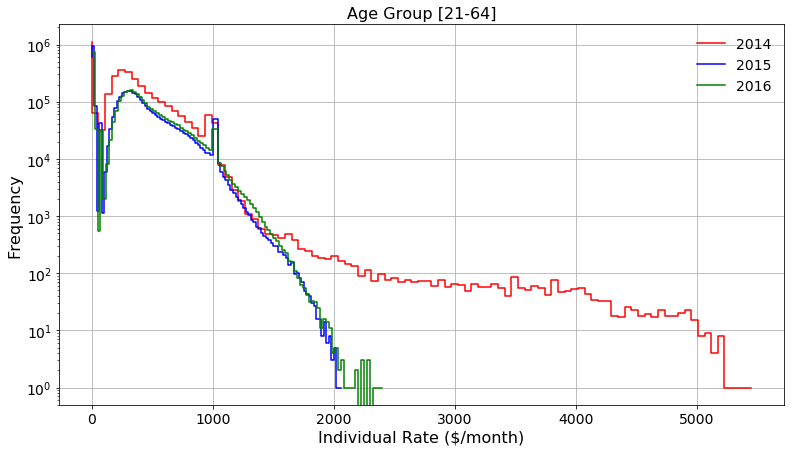

In [32]:
# Individual rate for age group 21-59
ind_rate14 = df_age21_64_14['IndividualRate']
ind_rate15 = df_age21_64_15['IndividualRate']
ind_rate16 = df_age21_64_16['IndividualRate']

y14, x14 = np.histogram(ind_rate14[ind_rate14<8.e3], bins=100)
y15, x15 = np.histogram(ind_rate15[ind_rate15<8.e3], bins=100)
y16, x16 = np.histogram(ind_rate16[ind_rate16<8.e3], bins=100)

plt.figure()
plt.step(x14[:-1],y14, color='r', label='2014', lw=1.5)
plt.step(x15[:-1],y15, color='b', label='2015', lw=1.5)
plt.step(x16[:-1],y16, color='g', label='2016', lw=1.5)
plt.yscale('log')
plt.xlabel("Individual Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')
plt.title('Age Group [21-64]')
plt.savefig('age_group_21_64.pdf')


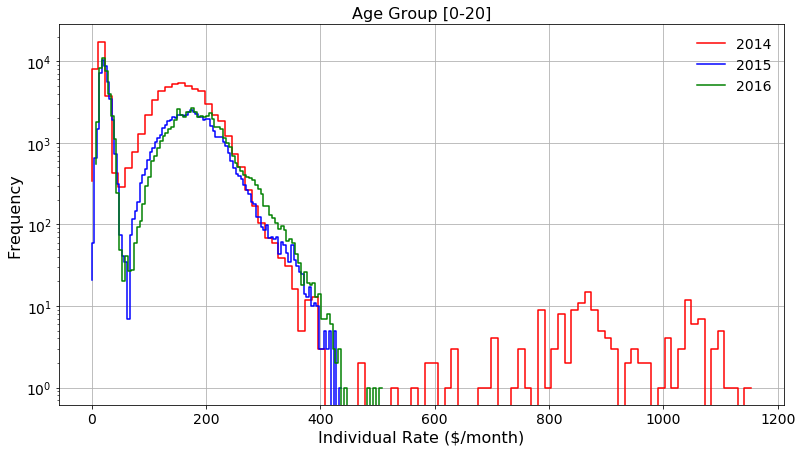

In [33]:
# Individual rate for age group 0-20
ind_rate14 = df_age0_20_14['IndividualRate']
ind_rate15 = df_age0_20_15['IndividualRate']
ind_rate16 = df_age0_20_16['IndividualRate']

y14, x14 = np.histogram(ind_rate14[ind_rate14<8.e3], bins=100)
y15, x15 = np.histogram(ind_rate15[ind_rate15<8.e3], bins=100)
y16, x16 = np.histogram(ind_rate16[ind_rate16<8.e3], bins=100)

plt.figure()
plt.step(x14[:-1],y14, color='r', label='2014', lw=1.5)
plt.step(x15[:-1],y15, color='b', label='2015', lw=1.5)
plt.step(x16[:-1],y16, color='g', label='2016', lw=1.5)
plt.yscale('log')
plt.xlabel("Individual Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')
plt.title('Age Group [0-20]')
plt.savefig('age_group_0_20.pdf')

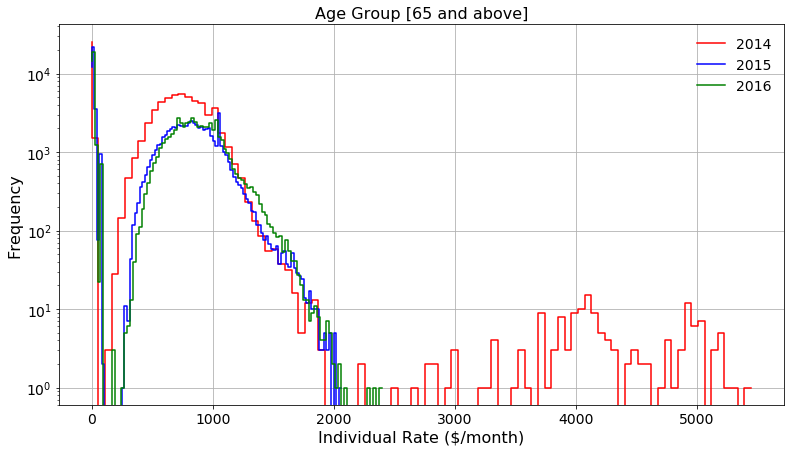

In [34]:
# Individual rate for age group 65 and above
ind_rate14 = df_age65_14['IndividualRate']
ind_rate15 = df_age65_15['IndividualRate']
ind_rate16 = df_age65_16['IndividualRate']

y14, x14 = np.histogram(ind_rate14[ind_rate14<8.e3], bins=100)
y15, x15 = np.histogram(ind_rate15[ind_rate15<8.e3], bins=100)
y16, x16 = np.histogram(ind_rate16[ind_rate16<8.e3], bins=100)

plt.figure()
plt.step(x14[:-1],y14, color='r', label='2014', lw=1.5)
plt.step(x15[:-1],y15, color='b', label='2015', lw=1.5)
plt.step(x16[:-1],y16, color='g', label='2016', lw=1.5)
plt.yscale('log')
plt.xlabel("Individual Rate ($/month)",fontsize=16,color='k')
plt.ylabel("Frequency",fontsize=16,color='k')
plt.legend(frameon=False, loc='upper right')
plt.title('Age Group [65 and above]')
plt.savefig('age_group_65_and_above.pdf')
